In [181]:
# importing  all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [182]:
#Load the dataset
df=pd.read_csv('university-wise-student-enrollment-of-higher-education-by-types-of-campuses-in-2074-bs.csv')
df

,University,Community,Constituent,Private,Total
0,Tribhuvan University,110013,102085,72355,284453
1,Nepal Sanskrit University,80,1250,141,1471
2,Kathmandu University,0,6801,9857,16658
3,Purbanchal University,802,950,21787,23539
4,Pokhara University,0,1881,24151,26032
5,Lumbini Bauddha University,0,77,119,196
6,Agriculture and Forestry University,0,1583,0,1583
7,Mid-Western University,0,3046,0,3046
8,Far Western University,0,2211,0,2211
9,BP Koirala Institute for Health Sciences,0,1448,0,1448


In [183]:
# Print the first five rows of the dataset
df.head()


,University,Community,Constituent,Private,Total
0,Tribhuvan University,110013,102085,72355,284453
1,Nepal Sanskrit University,80,1250,141,1471
2,Kathmandu University,0,6801,9857,16658
3,Purbanchal University,802,950,21787,23539
4,Pokhara University,0,1881,24151,26032


In [184]:
# Check the shape of the dataset
print(df.shape)

(16, 5)


In [185]:
# Check for missing values
print(df.isnull().sum())

University     0
Community      0
Constituent    0
Private        0
Total          0
dtype: int64


In [186]:

# Generate descriptive statistics of the dataset
print(df.describe())

           Community    Constituent        Private          Total
count      16.000000      16.000000      16.000000      16.000000
mean    13861.875000   15221.500000   16051.250000   45134.625000
std     37706.573734   37959.473771   35362.155629  109613.350693
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000      86.750000       0.000000     169.500000
50%         0.000000    1349.000000       0.000000    1527.000000
75%        20.000000    2419.750000   12839.500000   18378.250000
max    110895.000000  121772.000000  128410.000000  361077.000000


In [187]:

df.corr()


,Community,Constituent,Private,Total
Community,1.000000,0.994860,0.932838,0.989461
Constituent,0.994860,1.000000,0.955914,0.996917
Private,0.932838,0.955914,1.000000,0.974537
Total,0.989461,0.996917,0.974537,1.000000


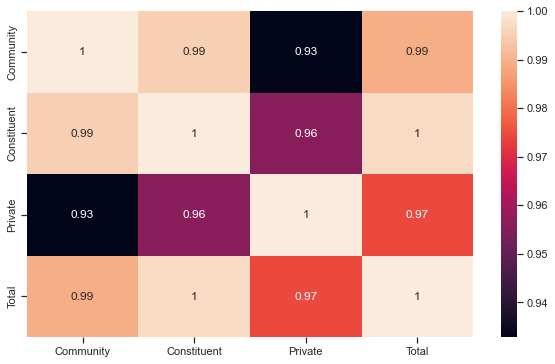

In [188]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [189]:
# Extract the relevant columns
X = df[['Community']]
y = df['Total']

In [190]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [191]:
# Perform polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

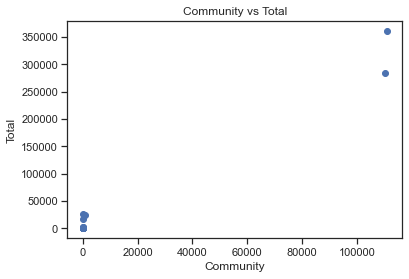

In [192]:
# Visualize the results
plt.scatter(df['Community'], df['Total'])
plt.title('Community vs Total')
plt.xlabel('Community')
plt.ylabel('Total')
plt.show()


In [193]:
# Define the independent and dependent variables
x = df['Community']
y = df['Total']

# Fit a polynomial curve of degree 2
p2 = np.polyfit(x, y, 2)
f2 = np.poly1d(p2)

# Fit a polynomial curve of degree 3
p3 = np.polyfit(x, y, 3)
f3 = np.poly1d(p3)

# Fit a polynomial curve of degree 4
p4 = np.polyfit(x, y, 4)
f4 = np.poly1d(p4)

# Fit a polynomial curve of degree 5
p5 = np.polyfit(x, y, 5)
f5 = np.poly1d(p5)



C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


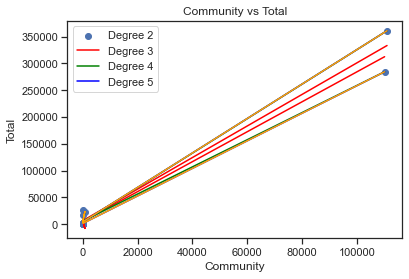

In [194]:
# Plot the data points and the polynomial curves
plt.scatter(x, y)
plt.plot(x, f2(x), color='red')
plt.plot(x, f3(x), color='green')
plt.plot(x, f4(x), color='blue')
plt.plot(x, f5(x), color='orange')
plt.title('Community vs Total')
plt.xlabel('Community')
plt.ylabel('Total')
plt.legend(['Degree 2', 'Degree 3', 'Degree 4', 'Degree 5'])
plt.show()

In [195]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 41460677.77312722
Root Mean Squared Error: 6438.996643354244
R-squared: -425.4813513058499


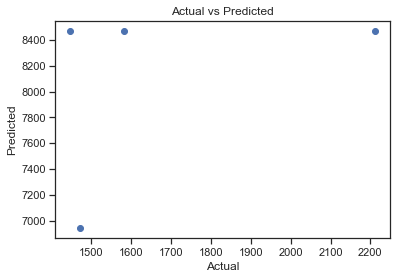

In [196]:
# Create a scatter plot of the actual versus predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


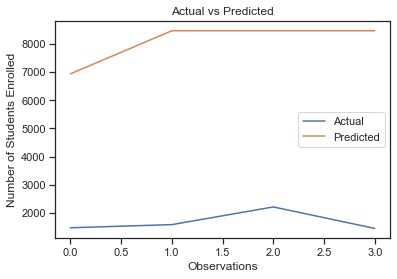

In [197]:
# Create a line plot of the actual and predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observations')
plt.ylabel('Number of Students Enrolled')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
